In [72]:
import dezero
from dezero import Variable, optimizers
import numpy as np
import dezero.functions as F
import dezero.models as Models
import dezero.optimizers as optimizers

def step(x):
    return (x >= 0).astype(float) 

sigma = 0.2
data_size = 100
x = np.random.rand(data_size, 1) * 2 - 1
y = step(x) + np.random.randn(data_size, 1) * sigma

model = Models.MLP((10, 32, 64, 1))
_ = model(x)

In [73]:
print(model.summary())

😸Model Summary:
type: MLP
Layer		Parameter
Linear		(10,)
			(1, 10)
____________________________________________________________
Linear		(32,)
			(10, 32)
____________________________________________________________
Linear		(64,)
			(32, 64)
____________________________________________________________
Linear		(1,)
			(64, 1)
____________________________________________________________
total parameter: 2549


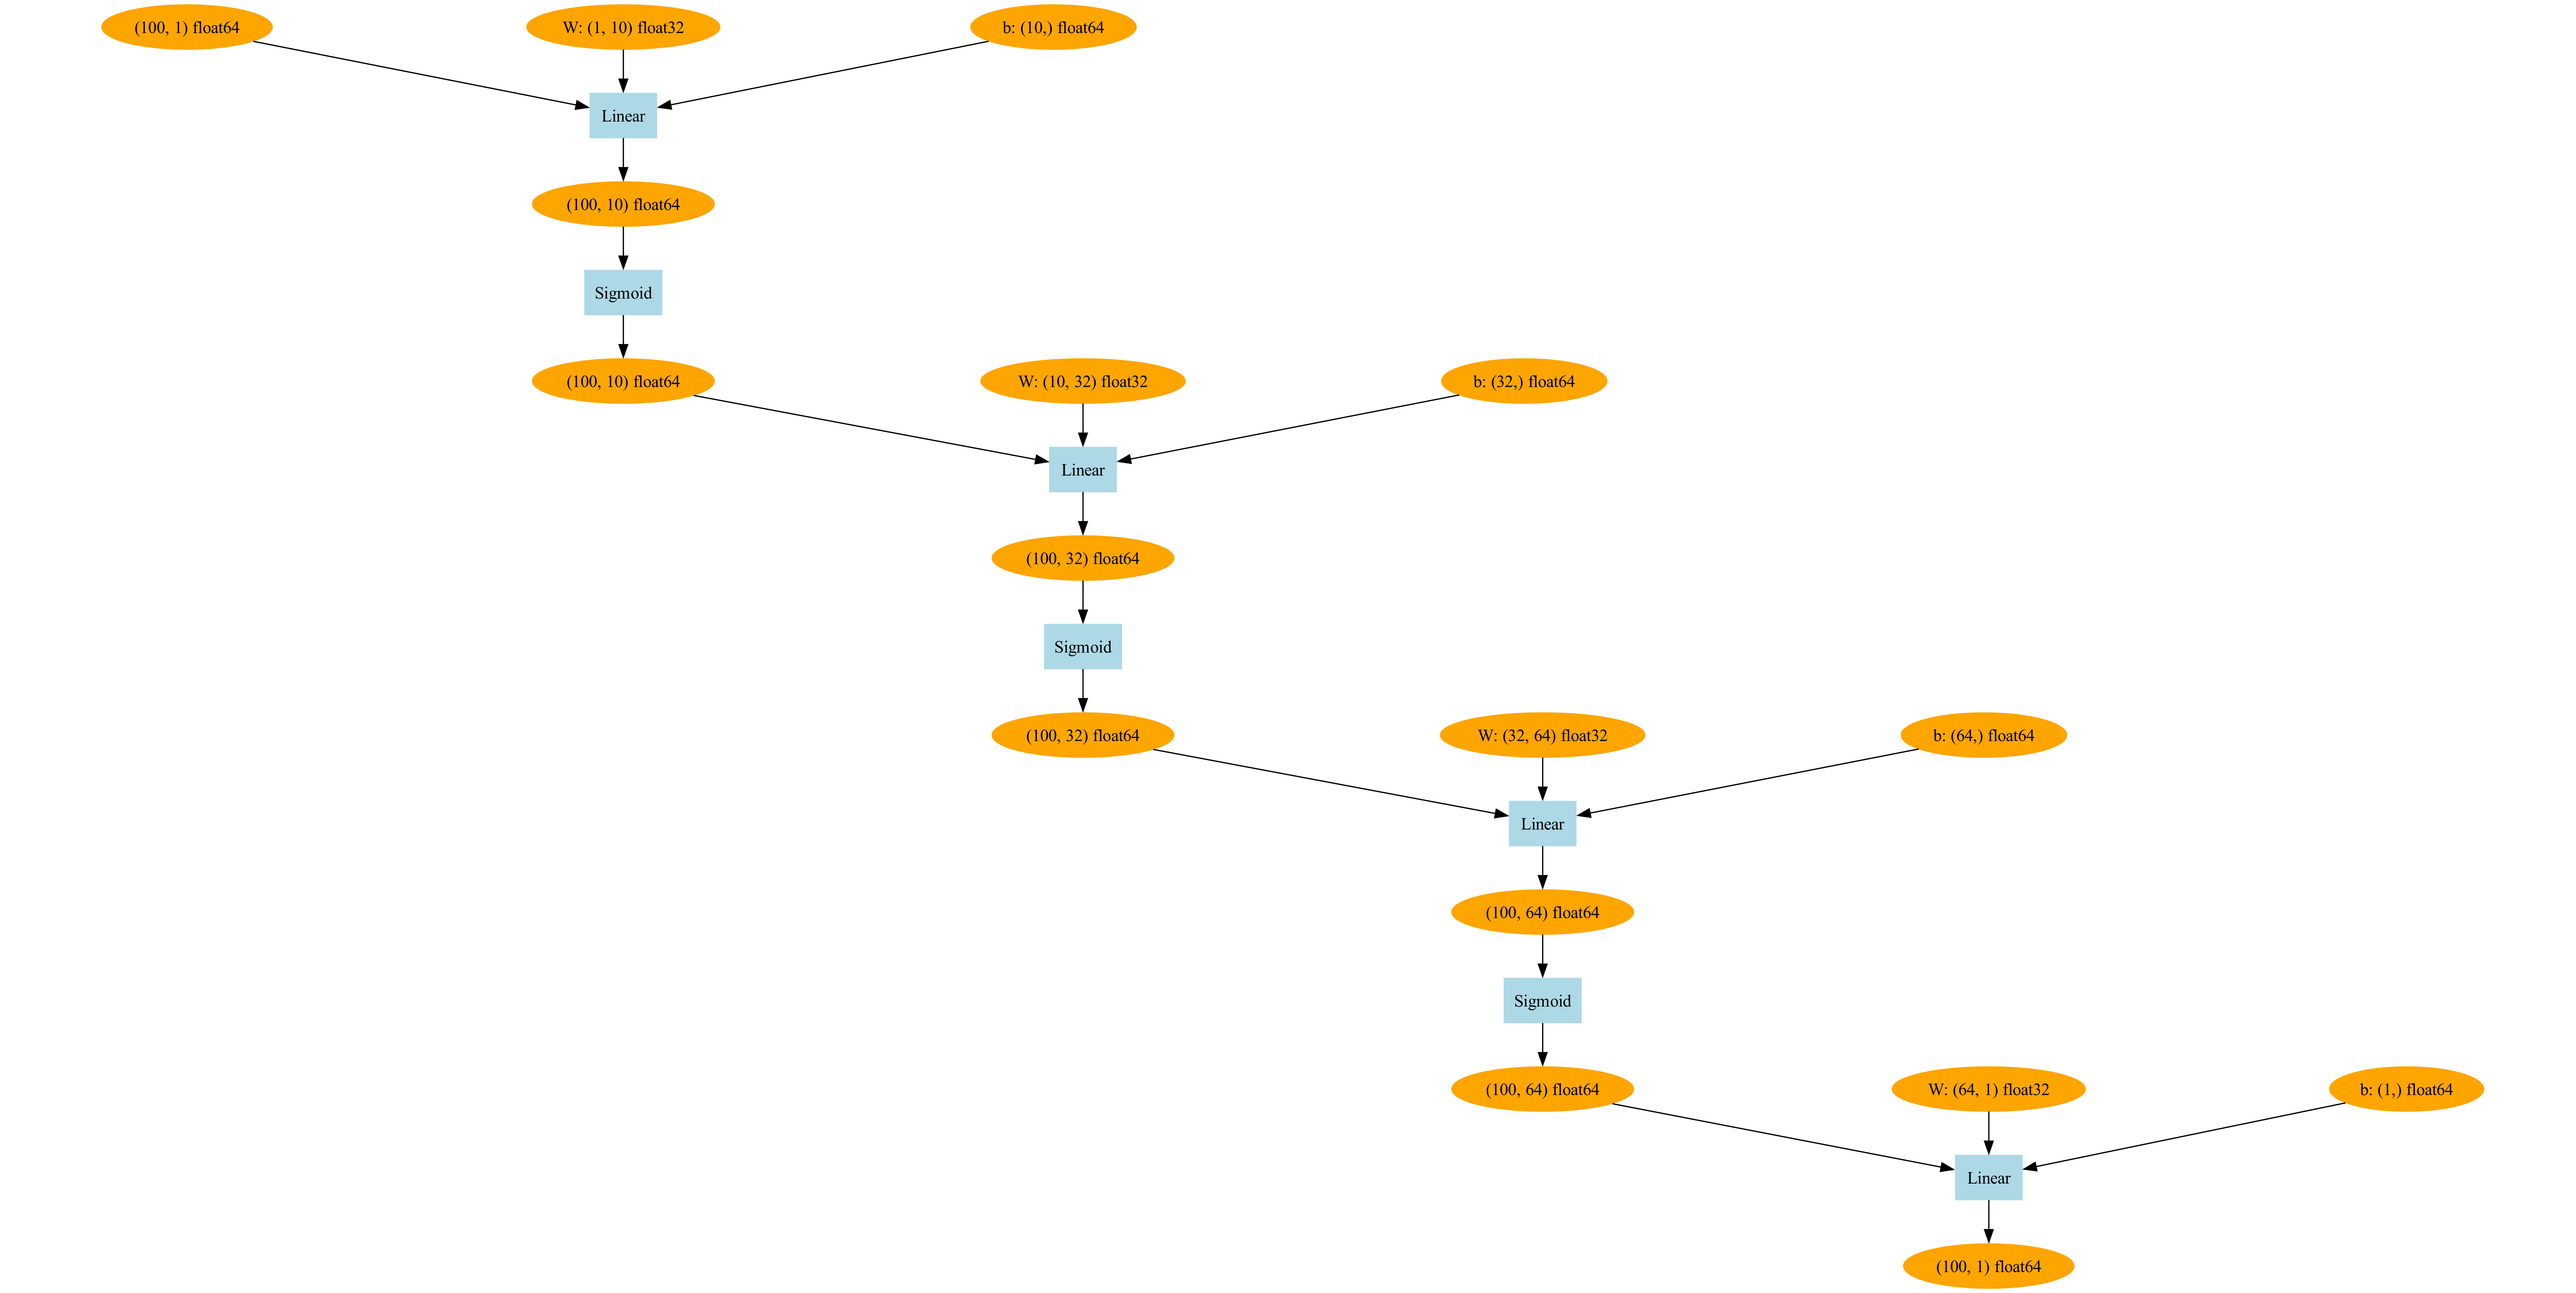

In [74]:
model.plot(x)

In [75]:
def generalization_error(model, func, x_min, x_max, n=10000):
    t = np.linspace(x_min, x_max, 10000).reshape(-1, 1)
    y = func(t)
    y_pred = model(t)
    return F.mean_squared_error(y, y_pred)

In [76]:
max_iter = 10000
optimizer = optimizers.Adam().setup(model)
losses = []
valid_losses = []
gen_errors = []
valid_x = np.random.rand(2000, 1) * 2 - 1
valid_y = step(valid_x) + np.random.randn(2000, 1)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y_pred, y)
    model.cleargrads()
    loss.backward()
    optimizer.update()
    if i % 10 == 0:
        print(i, loss.data)
        losses.append(loss.data)
        gen_errors.append(generalization_error(model, step, -1, 1).data)
        valid_losses.append(F.mean_squared_error(valid_y, model(valid_x)).data)

0 0.3330036426768013
10 0.3037668925638993
20 0.2994829927753094
30 0.2957639775347647
40 0.2919568095552396
50 0.287772884325402
60 0.28291102157435327
70 0.27708258985500245
80 0.27000939953745057
90 0.26136570877256105
100 0.25077421628374924
110 0.23787504656002048
120 0.22242610249832317
130 0.2044927487808993
140 0.18473614043588105
150 0.16470225794510518
160 0.14683378756069673
170 0.13375380072420062
180 0.1267156212820535
190 0.12444115753382136
200 0.12421941860777286
210 0.12425590156850927
220 0.12419345810604578
230 0.1241332019071601
240 0.12410481534324633
250 0.12408662463231884
260 0.12406780908582754
270 0.1240483298156963
280 0.12402890272739514
290 0.12400929316930658
300 0.12398926139904048
310 0.12396876093949198
320 0.12394778361096025
330 0.1239263094530699
340 0.12390432371955618
350 0.12388181489474602
360 0.12385877284449044
370 0.12383518752497713
380 0.12381104792852572
390 0.12378634320282948
400 0.12376106217148167
410 0.12373519272402095
420 0.123708721

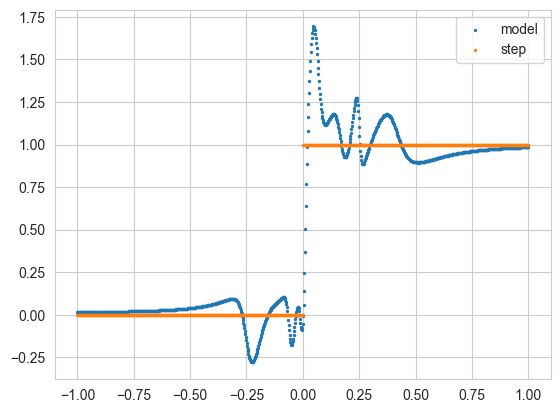

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

X = np.linspace(-1, 1, 1000).reshape(-1, 1)
plt.scatter(X, model(X).data, s=2, label='model')
plt.scatter(X, step(X), s=2, label='step')
plt.legend()



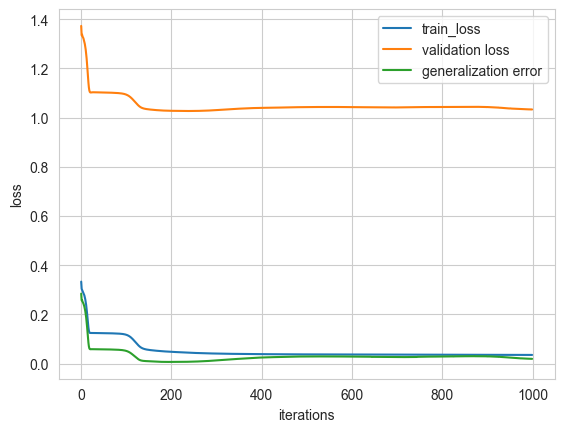

In [78]:
plt.plot(losses, label='train_loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(valid_losses, label='validation loss')
plt.plot(gen_errors, label='generalization error')
plt.legend()

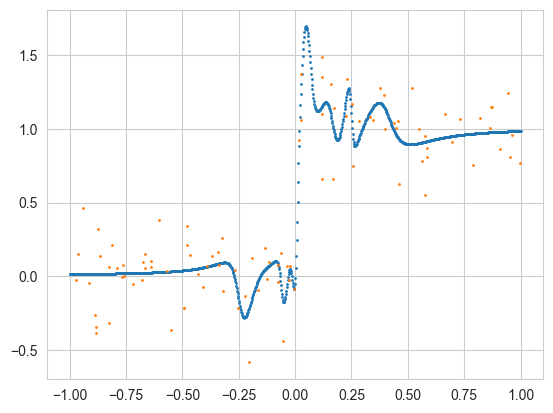

In [79]:
plt.scatter(X, model(X).data, s=1)
plt.scatter(x, y, s=1)

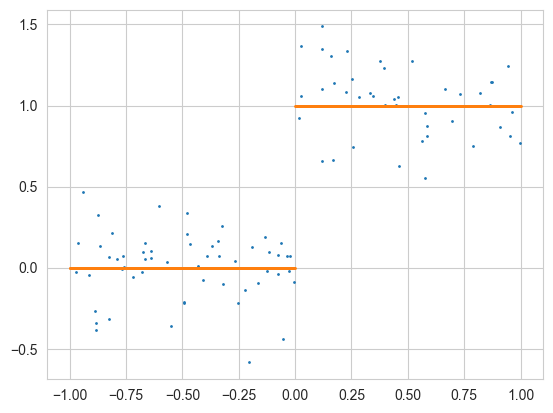

In [80]:
plt.scatter(x, y, s=1)
plt.scatter(X, step(X), s=1)